In [ ]:
# Change the cols from pima-indians-diabetes.csv to 
# Number_of_times_pregnant, Plasma_glucose_concentration, Diastolic_blood_pressure, Triceps_skin_fold_thickness, Serum_insulin, Body_mass_index, Diabetes_pedigree_function, Age, Class_variable

Accuracy: 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231

Confusion Matrix:
 [[107  44]
 [ 25  55]]


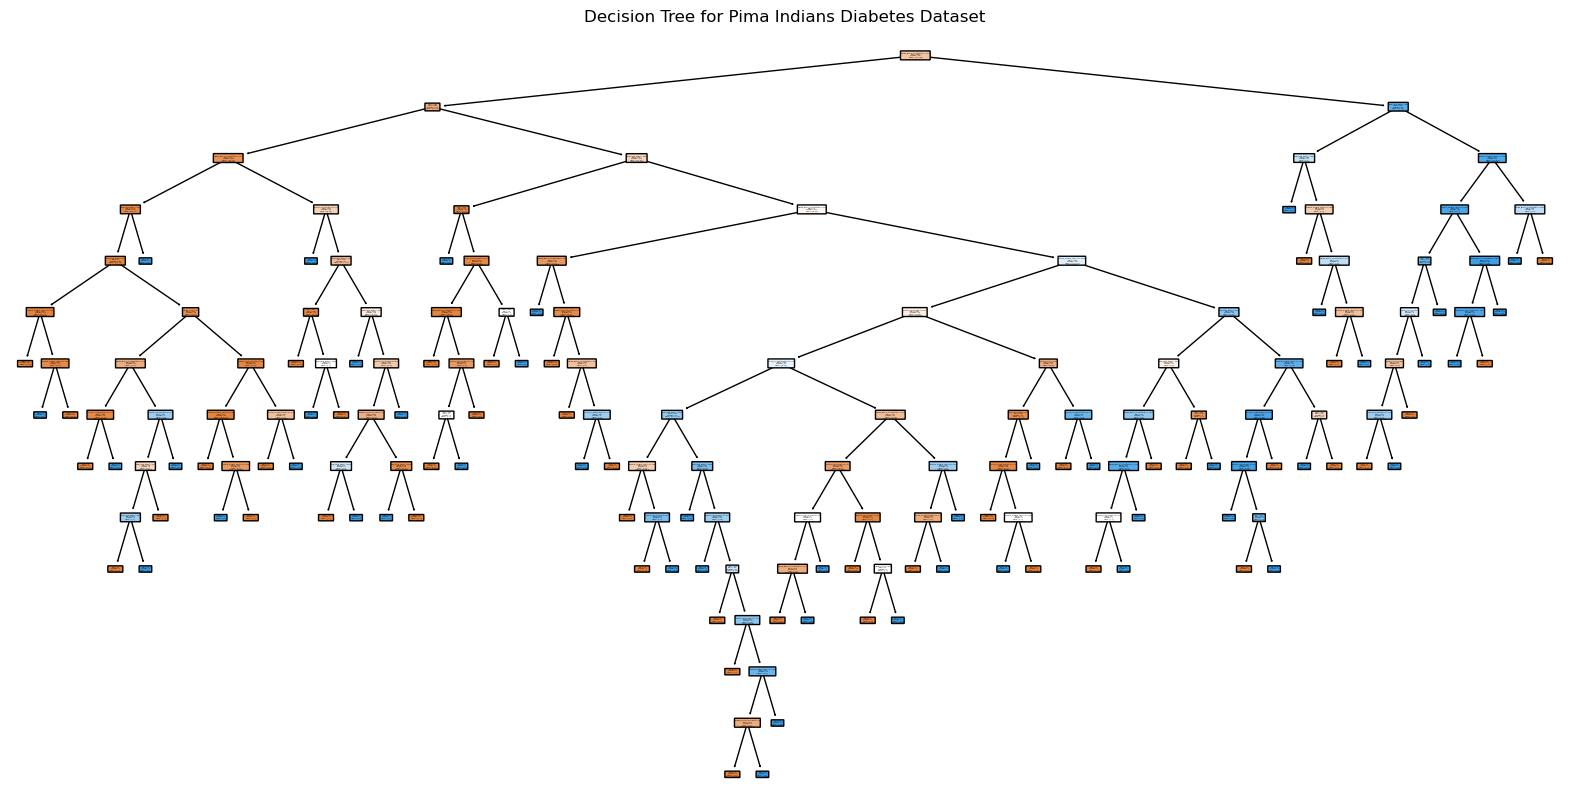

Random Sample Prediction: 0
Actual Value: 0


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
# Load the dataset with header specified
url = './Datasets/pima-indians-diabetes.csv'
column_names = [
    "Number_of_times_pregnant", "Plasma_glucose_concentration", "Diastolic_blood_pressure", 
    "Triceps_skin_fold_thickness", "Serum_insulin", "Body_mass_index", 
    "Diabetes_pedigree_function", "Age", "Class_variable"
]
df = pd.read_csv(url, names=column_names, header=0)

# Split data into features (X) and target (y)
X = df.drop("Class_variable", axis=1)
y = df["Class_variable"]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True, rounded=True)
plt.title("Decision Tree for Pima Indians Diabetes Dataset")
plt.show()

# Test the decision tree on a random sample from the test set
import random
random_index = random.randint(0, len(X_test) - 1)
random_sample = X_test.iloc[random_index:random_index+1]
random_pred = clf.predict(random_sample)
print(f"Random Sample Prediction: {random_pred[0]}")
print("Actual Value:", y_test.iloc[random_index])
